In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
# tf.__version__

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Project/dataset/hmnist_28_28_RGB.csv")

In [ ]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92,2


In [ ]:
labels = df['label']

In [ ]:
df = df.drop(labels=["label"],axis=1)
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2312,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,217,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,187,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,176,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,160,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,219,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92


In [ ]:
labels.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

In [3]:
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

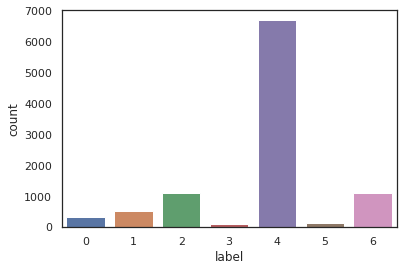

In [ ]:
sns.countplot(labels)

In [ ]:
labels.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
df.isnull().any().describe()

count      2352
unique        1
top       False
freq       2352
dtype: object

In [ ]:
df = df/255.0

In [ ]:
 df = df.values.reshape(-1,28,28,1)

In [ ]:
 labels = tf.keras.utils.to_categorical(labels,num_classes=7)

In [ ]:
random_seed = 42

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(df,labels,test_size=0.2,random_state=random_seed)

In [ ]:
# plt.imshow(x_train[0][:,:,0])

In [ ]:
model = XGBClassifier(objective="multi:softmax",n_estimators=1000,learning_rate=0.01,random_state=random_seed)
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(classification_report(y_val,y_pred,labels=[0,1,2,3,4,5,6]))

              precision    recall  f1-score   support

           0       0.30      0.13      0.18        69
           1       0.37      0.41      0.39        93
           2       0.47      0.37      0.41       228
           3       0.00      0.00      0.00        28
           4       0.78      0.95      0.85      1338
           5       1.00      0.19      0.32        21
           6       0.54      0.12      0.19       226

    accuracy                           0.71      2003
   macro avg       0.49      0.31      0.34      2003
weighted avg       0.67      0.71      0.67      2003



In [ ]:
  from sklearn.model_selection import RandomizedSearchCV
  model = XGBClassifier(#tree_method = "exact", predictor = "cpu_predictor",
                        # verbosity = True,
                        objective = "multi:softmax")
  parameters = {"learning_rate": [0.1, 0.01, 0.001],
                "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
                 "max_depth": [2, 4, 7, 10],
                 "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
                 "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
                 "reg_alpha": [0, 0.5, 1],
                 "reg_lambda": [1, 1.5, 2, 3, 4.5],
                 "min_child_weight": [1, 3, 5, 7],
                 "n_estimators": [100, 250, 500, 1000]}
  model_rsc = RandomizedSearchCV(model,param_distributions = parameters, scoring = "accuracy",
                               cv = 10, verbose = 3, random_state = random_seed)
  model_xgboost = model_rsc.fit(x_train, y_train)
  print("best classifier: ",model_xgboost.best_estimator_)

  final_mmodel = model_rsc.best_estimator_

  pred = final_model.predict(x_val)
  print(classification_report(y_val,pred,labels=[0,1,2,3,4,5,6]))

In [ ]:
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters =32,kernel_size = (5,5),padding ='Same',activation = 'relu',input_shape= (28,28,3)))
  model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
  model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation = "relu"))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(7, activation = "softmax"))

In [ ]:
  optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
  model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
  learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
  epochs = 10
  batch_size = 32

In [ ]:
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(
         featurewise_center=False,
         samplewise_center=False,
         featurewise_std_normalization=False, 
         samplewise_std_normalization=False, 
         zca_whitening=False, 
         rotation_range=80, 
         zoom_range = 0.3, 
         width_shift_range=0.3, 
         height_shift_range=0.3,  
         horizontal_flip=True,  
         
         vertical_flip=True) 


  datagen.fit(x_train)

In [ ]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])



In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files

files.download('model.tflite')

In [ ]:
IMAGE_SIZE = 32
BATCH_SIZE = 64

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=60, width_shift_range=0.9,
    height_shift_range=0.9, brightness_range=None, shear_range=0.5, zoom_range=0.3,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=True, rescale=1./255, preprocessing_function=None,
    data_format=None, validation_split=0.2, dtype=None
)
datagen.fit(x_train)


train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

datagen.fit(x_train)



In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
# base_model.trainable = True

In [ ]:
Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Fine tune from this layer onwards
fine_tune_at = 100

Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

In [ ]:
history_fine = model.fit_generator(datagen.flow(x_train,y_train,batch_size=BATCH_SIZE), 
                         steps_per_epoch=len(x_train)/BATCH_SIZE, 
                         epochs=5, 
                         validation_data=(x_val,y_val), 
                         validation_steps=len(x_val)/BATCH_SIZE)

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)